In [2]:
# Install required packages (if not already installed)
!pip install seaborn xgboost joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib

# Load dataset
url = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(url)

# Preview
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

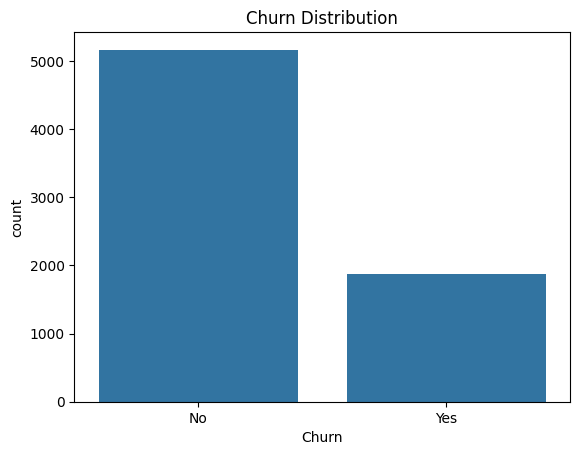

In [3]:
# Drop customerID
data.drop('customerID', axis=1, inplace=True)

# Replace spaces with NaN in 'TotalCharges'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values
data.dropna(inplace=True)

# Basic stats
print(data.info())
print(data['Churn'].value_counts())

# Visual: Churn distribution
sns.countplot(data=data, x='Churn')
plt.title("Churn Distribution")
plt.show()


In [4]:
# Binary encoding for 'Yes/No' columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = data[col].map({'Yes':1, 'No':0})

# One-hot encode remaining categorical columns
data = pd.get_dummies(data, drop_first=True)

# Separate features and label
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"----- {name} -----")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print()


----- Logistic Regression -----
Accuracy: 0.7875
Confusion Matrix:
 [[915 118]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


----- Random Forest -----
Accuracy: 0.7818
Confusion Matrix:
 [[925 108]
 [199 175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


----- XGBoost -----
Accuracy: 0.7633
Confusion Matrix:
 [[898 135]
 [198 176]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407




In [9]:
# Save XGBoost (best performing)
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)
joblib.dump(best_model, "xgboost_telco_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler_telco.pkl")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['scaler_telco.pkl']

In [10]:
# Load
loaded_model = joblib.load("xgboost_telco_model.pkl")
loaded_scaler = joblib.load("scaler_telco.pkl")

# Predict a sample
sample = X_test[0].reshape(1, -1)
pred = loaded_model.predict(sample)
print("Predicted Churn:", "Yes" if pred[0] == 1 else "No")


Predicted Churn: No
